In [11]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [8]:
pokemon = pd.read_csv('pokemon.csv')

In [9]:
pokemon.head()

,id,species,generation_id,height,weight,base_experience,type_1,type_2,hp,attack,defense,speed,special-attack,special-defense
0,1,bulbasaur,1,0.7,6.9,64,grass,poison,45,49,49,45,65,65
1,2,ivysaur,1,1.0,13.0,142,grass,poison,60,62,63,60,80,80
2,3,venusaur,1,2.0,100.0,236,grass,poison,80,82,83,80,100,100
3,4,charmander,1,0.6,8.5,62,fire,NaN,39,52,43,65,60,50
4,5,charmeleon,1,1.1,19.0,142,fire,NaN,58,64,58,80,80,65


### Simple bar chat using Seaborn Countplot

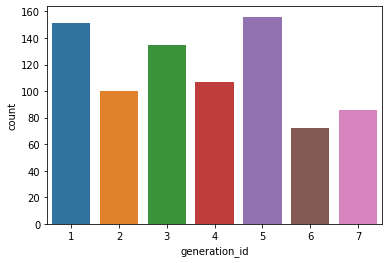

In [16]:
sns.countplot(data = pokemon,x='generation_id');

#### Getting rid of the unnecessary colouring 

In [17]:
#prints tuples of the color palette 
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

In [18]:
#selecting the first color and assigning to a variable 
base_color = sns.color_palette()[0]

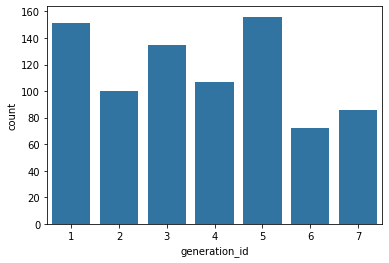

In [20]:
#recreating the bar plot using the base color variable 
sns.countplot(data = pokemon,x='generation_id',color=base_color);

#### Ordering the bars by value

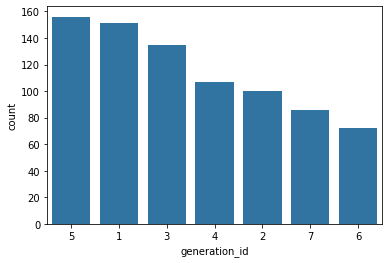

In [31]:
#using the order parameter to order the bars
sns.countplot(data = pokemon,
              x='generation_id',
              color=base_color,
             order=[5,1,3,4,2,7,6]);

This is a bit verbose and we should do it programatically 

In [25]:
#produces an list of the value counts in descending order
pokemon['generation_id'].value_counts()

5    156
1    151
3    135
4    107
2    100
7     86
6     72
Name: generation_id, dtype: int64

In [27]:
#accessing the index of the value_counts() function
pokemon['generation_id'].value_counts().index

Int64Index([5, 1, 3, 4, 2, 7, 6], dtype='int64')

In [28]:
gen_order = pokemon['generation_id'].value_counts().index

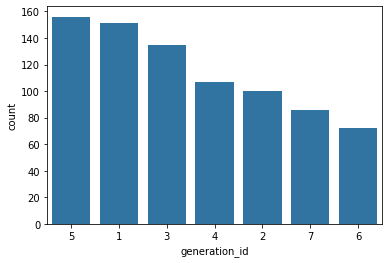

In [30]:
#same result as the last chart but this is a repeatable and easy way to do it
sns.countplot(data = pokemon,
              x='generation_id',
              color=base_color,
             order=gen_order);


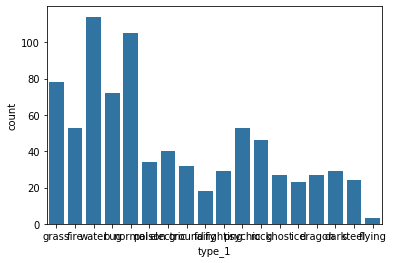

In [32]:
sns.countplot(data = pokemon, x='type_1',color=base_color)

This worked except the labels overlap due to their length. We can use matplot libs xticks(rotation = ) to rotate them

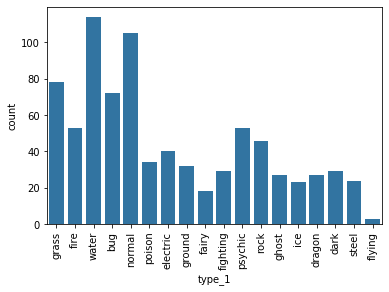

In [35]:
sns.countplot(data = pokemon, x='type_1',color=base_color)
plt.xticks(rotation=90);

Another strategy is to make the barchart horizontal. In seaborn, we just assign the variable we're evaluating to y instead of x

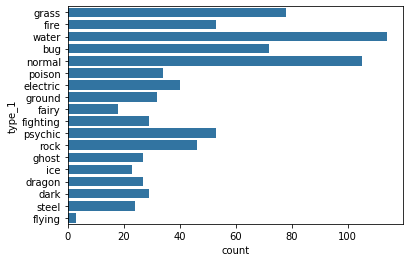

In [36]:
sns.countplot(data = pokemon, y='type_1',color=base_color);

And again, we'll sort it by frequency descending 

In [37]:
type_order = pokemon['type_1'].value_counts().index

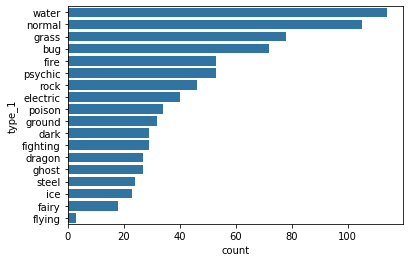

In [38]:
sns.countplot(data = pokemon, y='type_1',color=base_color,order=type_order);

#### These were all done using the absolute frequency of the type_1 variable. We might want to look at the relative frequency/proportion

In [43]:
pokemon_type = pokemon.melt(id_vars = ['id','species'],
                           value_vars = ['type_1','type_2'],
                           var_name = 'type_level',
                           value_name = 'type').dropna()
pokemon_type.sample(10)

,id,species,type_level,type
560,561,sigilyph,type_1,psychic
326,327,spinda,type_1,normal
467,468,togekiss,type_1,fairy
611,612,haxorus,type_1,dragon
715,716,xerneas,type_1,fairy
739,740,crabominable,type_1,fighting
212,213,shuckle,type_1,bug
429,430,honchkrow,type_1,dark
688,689,barbaracle,type_1,rock
980,174,igglybuff,type_2,fairy


In [44]:
type_counts = pokemon_type['type'].value_counts()
type_counts

water       131
normal      109
flying       98
grass        97
psychic      82
bug          77
poison       66
fire         64
ground       64
rock         60
fighting     54
electric     48
steel        47
fairy        47
dark         46
dragon       45
ghost        43
ice          34
Name: type, dtype: int64

In [46]:
type_order = type_counts.index
type_order

Index(['water', 'normal', 'flying', 'grass', 'psychic', 'bug', 'poison',
       'fire', 'ground', 'rock', 'fighting', 'electric', 'steel', 'fairy',
       'dark', 'dragon', 'ghost', 'ice'],
      dtype='object')

Now we need to find the maximum proportion of bar

In [48]:
n_pokemon = pokemon_type['type'].value_counts().sum()
max_type_count = type_counts[0]
max_prop = max_type_count / n_pokemon
max_prop

0.10808580858085809

Now we create an array of evenly spaced proportioned values - starting at 0, ending at the max_prop (longest bar from above), in increments of 0.02

In [51]:
tick_props = np.arange(0, max_prop, 0.02)
tick_props


array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 ])

We need x-tick labels that must be evenly spaced on the x-axis. For this purpose, we must have a list of labels ready with us, before using it with plt.xticks() function.

In [53]:
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
tick_names

['0.00', '0.02', '0.04', '0.06', '0.08', '0.10']

## Printing the actual values on the ends of the bars

Ugly version with long numbers

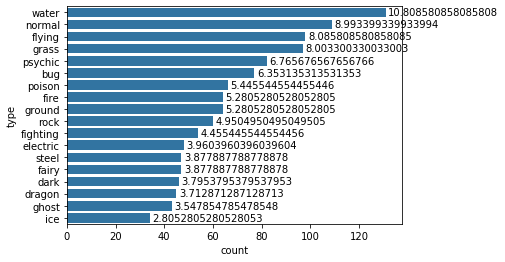

In [62]:
sns.countplot(data = pokemon_type,
              y = 'type',
             color = base_color,
             order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    #convert to percentage
    pct_string = (100 * count/n_pokemon)
    plt.text(count + 1, i, pct_string, va = 'center')

Nicer looking with some number formatting 

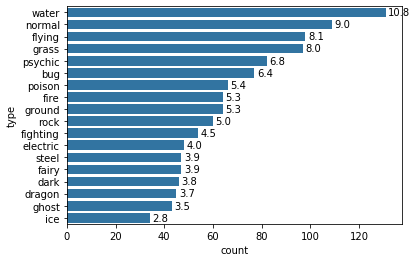

In [66]:
sns.countplot(data = pokemon_type,
              y = 'type',
             color = base_color,
             order = type_order)

for i in range(type_counts.shape[0]):
    count = type_counts[i]
    #convert to percentage
    pct_string = '{:0.1f}'.format(100 * count/n_pokemon)
    plt.text(count + 1, i, pct_string, va = 'center')

In [75]:
from matplotlib import rcParams
# Specify the figure size in inches, for both X, and Y axes
rcParams['figure.figsize'] = 12,4

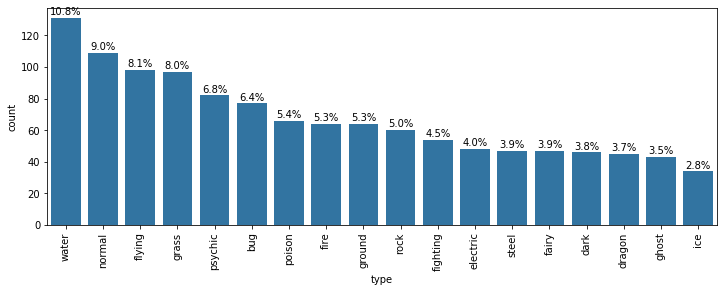

In [76]:
# Considering the same chart from the Example 1 above, print the text (proportion) BELOW the bars
base_color = sns.color_palette()[0]
sns.countplot(data=pokemon_type, x='type', color=base_color, order=type_order);


# Recalculating the type_counts just to have clarity.
type_counts = pokemon_type['type'].value_counts()

# get the current tick locations and labels
locs, labels = plt.xticks(rotation=90) 

# loop through each pair of locations and labels
for loc, label in zip(locs, labels):

    # get the text property for the label to get the correct count
    count = type_counts[label.get_text()]
    pct_string = '{:0.1f}%'.format(100*count/n_pokemon)

    # print the annotation just below the top of the bar
    plt.text(loc, count+2, pct_string, ha = 'center', color = 'black')